<a href="https://colab.research.google.com/github/kmayutrisna/IMDB_CNN_biLSTM/blob/main/IMDB_ML_TrainTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [2]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =pd.read_csv("drive/My Drive/data/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
data.shape

(50000, 2)

In [6]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


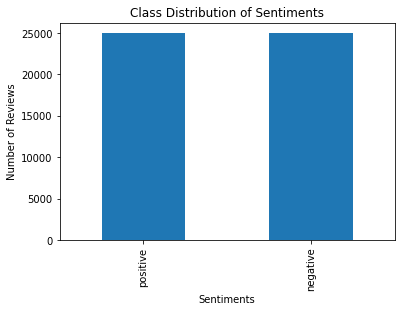

In [7]:
# Create a bar plot of the class distribution
class_counts = data['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [8]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [9]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['review'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [10]:
# Split the text into individual words
words = all_text.split()

In [12]:
# Remove stop words
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 132498),
 ('/><br', 100974),
 ('The', 67317),
 ('movie', 60762),
 ('film', 54277),
 ('one', 41334),
 ('like', 36028),
 ('This', 24329),
 ('would', 23578),
 ('good', 22582),
 ('It', 21475),
 ('really', 21322),
 ('even', 20979),
 ('see', 20364),
 ('-', 18201),
 ('get', 17333),
 ('much', 16827),
 ('story', 16443),
 ('time', 15312),
 ('make', 14859),
 ('could', 14689),
 ('also', 14607),
 ('people', 14414),
 ('great', 14385),
 ('/>The', 14335),
 ('first', 14283),
 ('made', 13418),
 ('think', 13083),
 ('bad', 12847),
 ('many', 12175),
 ('<br', 12028),
 ('never', 11984),
 ('two', 11489),
 ('But', 11435),
 ('little', 11206),
 ('it.', 11116),
 ('way', 11089),
 ('And', 11060),
 ('well', 10789),
 ('watch', 10688),
 ('movie.', 10659),
 ('know', 10656),
 ('seen', 10554),
 ('characters', 10448),
 ('character', 10307),
 ("It's", 10224),
 ('movies', 10118),
 ('love', 10033),
 ('best', 9899),
 ('ever', 9897),
 ('A', 9656),
 ('In', 9482),
 ('films', 9406),
 ('still', 9405),
 ('plot', 9305),
 ('ac

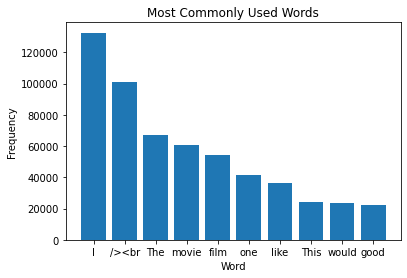

In [14]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [15]:
#Text Cleaning
import re #regular expression

def remove_url(text):
    url_tag = re.compile(r'https://\S+|www\.\S+')
    text = url_tag.sub(r'', text)
    return text

def remove_html(text):
    html_tag = re.compile(r'<.*?>')
    text = html_tag.sub(r'', text)
    return text

def remove_punctuation(text): 
    punct_tag = re.compile(r'[^\w\s]')
    text = punct_tag.sub(r'', text) 
    return text

def remove_special_character(text):
    special_tag = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_tag.sub(r'', text)
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text    
    
def clean_text(text):
    text = remove_url(text)
    text = remove_html(text)
    text = remove_punctuation(text)
    text = remove_special_character(text)
    text = remove_emojis(text)
    text = text.lower()
    
    return text

In [16]:
#Display datas that has been cleaned
data['processed'] = data['review'].apply(lambda x: clean_text(x))
data.head()

,review,sentiment,processed
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [17]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(data['processed']).toarray()
y = data['sentiment']

In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
#Devide data into train (70%), validation (20%) and test sets (10%)
import numpy as np
train_size = int(0.7*25000)
val_size = int(0.2*25000)

data_train = pd.concat((data_0[:train_size], data_1[:train_size]), axis = 0)
data_val = pd.concat((data_0[train_size: (train_size + val_size)], data_1[train_size:(train_size + val_size)]), axis = 0)
data_test = pd.concat((data_0[(train_size + val_size):], data_1[(train_size + val_size):]), axis = 0)

#print(data_test)

X_train, y_train = list(data_train['processed']), np.array(data_train['Label'])
X_val, y_val = list(data_val['processed']), np.array(data_val['Label'])
X_test, y_test = list(data_test['processed']), np.array(data_test['Label'])



print('Train size:', len(X_train))
print('Validation size: ', len(X_val))
print('Test size: ', len(X_test))

Train size: 35000
Validation size:  10000
Test size:  5000


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [33]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

In [35]:
y_pred

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [36]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.877


<AxesSubplot:>

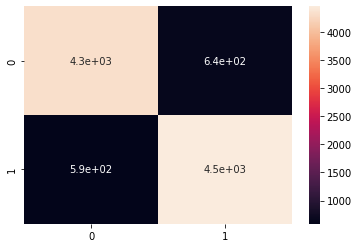

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [38]:
cm

array([[4318,  643],
       [ 587, 4452]])

**MULTINUMOAL NAIVE BAYES**

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# train a Naive Bayes classifier
mnb = MultinomialNB()
mnb

MultinomialNB()

In [40]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [41]:
# evaluate the classifier on the test set
y_pred = mnb.predict(X_test)
y_pred

array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

In [42]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8352


<AxesSubplot:>

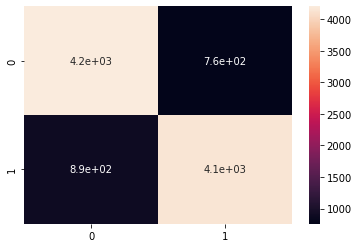

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [44]:
cm

array([[4203,  758],
       [ 890, 4149]])

**DECISION TREE**

In [47]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score # train a Decision Tree classifier 
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# evaluate the classifier on the test set
y_pred = dt.predict(X_test)
y_pred

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [50]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7184


<AxesSubplot:>

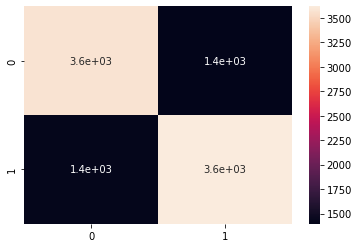

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [52]:
cm

array([[3566, 1395],
       [1421, 3618]])